In [1]:
# 查看当前挂载的数据集目录, 该目录下的变更重启环境后会自动还原
# View dataset directory. This directory will be recovered automatically after resetting environment. 
!ls /home/aistudio/data

data13047


In [2]:
# 查看工作区文件, 该目录下的变更将会持久保存. 请及时清理不必要的文件, 避免加载过慢.
# View personal work directory. All changes under this directory will be kept even after reset. Please clean unnecessary files in time to speed up environment loading.
!ls /home/aistudio/work

请点击[此处](https://ai.baidu.com/docs#/AIStudio_Project_Notebook/a38e5576)查看本环境基本用法.  <br>
Please click [here ](https://ai.baidu.com/docs#/AIStudio_Project_Notebook/a38e5576) for more detailed instructions. 

In [3]:
!pip install seaborn
!pip install cufflinks
!pip install missingno

Looking in indexes: https://pypi.mirrors.ustc.edu.cn/simple/
Looking in indexes: https://pypi.mirrors.ustc.edu.cn/simple/
Looking in indexes: https://pypi.mirrors.ustc.edu.cn/simple/


In [4]:
!pip install pandas-profiling

Looking in indexes: https://pypi.mirrors.ustc.edu.cn/simple/


- 金融风控问题的正负样本一般在10:1到30:1（一开始是10:1，到后面是20:1甚至30:1）

In [5]:
import numpy as np
import pandas as pd
import pandas_profiling
import seaborn as sns
import cufflinks as cf
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
df = pd.read_csv('/home/aistudio/data/data13047/anStats_2016Q3.c', skiprows = 1, low_memory = False)

In [7]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,30000.0,30000.0,30000.0,60 months,13.99%,697.90,C,C3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,20150.0,20150.0,20150.0,60 months,24.99%,591.32,E,E4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,30000.0,30000.0,30000.0,36 months,10.99%,982.02,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,15000.0,15000.0,15000.0,36 months,13.99%,512.60,C,C3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,18000.0,18000.0,18000.0,60 months,14.49%,423.42,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object', length=145)

In [9]:
df.shape

(99122, 145)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99122 entries, 0 to 99121
Columns: 145 entries, id to settlement_term
dtypes: float64(107), object(38)
memory usage: 109.7+ MB


In [11]:
df.iloc[:5, : 7]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate
0,NaN,NaN,30000.0,30000.0,30000.0,60 months,13.99%
1,NaN,NaN,20150.0,20150.0,20150.0,60 months,24.99%
2,NaN,NaN,30000.0,30000.0,30000.0,36 months,10.99%
3,NaN,NaN,15000.0,15000.0,15000.0,36 months,13.99%
4,NaN,NaN,18000.0,18000.0,18000.0,60 months,14.49%


In [12]:
df_clean = df.copy()

In [13]:
df_clean.drop('id', axis = 1, inplace = True)

In [14]:
df_clean.drop('member_id', axis = 1, inplace = True)

In [15]:
df_clean.iloc[: 5, : 7]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade
0,30000.0,30000.0,30000.0,60 months,13.99%,697.90,C
1,20150.0,20150.0,20150.0,60 months,24.99%,591.32,E
2,30000.0,30000.0,30000.0,36 months,10.99%,982.02,B
3,15000.0,15000.0,15000.0,36 months,13.99%,512.60,C
4,18000.0,18000.0,18000.0,60 months,14.49%,423.42,C


In [16]:
df_clean.int_rate = pd.Series(df['int_rate']).str.replace('%', '').astype(float)

In [17]:
df_clean.query('loan_amnt != funded_amnt').isnull().any().value_counts()

True    143
dtype: int64

In [18]:
df_clean.dropna(axis = 0, how = 'all', inplace = True)

In [19]:
df_clean.dropna(axis = 1, how = 'all', inplace = True)

In [20]:
df_clean.iloc[ : 5, : 20]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,desc,purpose,title,zip_code
0,30000.0,30000.0,30000.0,60 months,13.99,697.90,C,C3,General Manager,10+ years,MORTGAGE,109000.0,Source Verified,Sep-2016,Fully Paid,n,NaN,debt_consolidation,Debt consolidation,604xx
1,20150.0,20150.0,20150.0,60 months,24.99,591.32,E,E4,Server,4 years,RENT,48000.0,Not Verified,Sep-2016,Current,n,NaN,debt_consolidation,Debt consolidation,984xx
2,30000.0,30000.0,30000.0,36 months,10.99,982.02,B,B4,server,2 years,RENT,80000.0,Source Verified,Sep-2016,Fully Paid,n,NaN,debt_consolidation,Debt consolidation,112xx
3,15000.0,15000.0,15000.0,36 months,13.99,512.60,C,C3,Fiscal Director,2 years,RENT,55000.0,Not Verified,Sep-2016,Fully Paid,n,NaN,debt_consolidation,Debt consolidation,372xx
4,18000.0,18000.0,18000.0,60 months,14.49,423.42,C,C4,utility technician 2,10+ years,RENT,75000.0,Not Verified,Sep-2016,Charged Off,n,NaN,debt_consolidation,Debt consolidation,605xx


In [21]:
df_clean.emp_title.value_counts()
###分类过多，可以舍弃掉

Teacher                               1931
Manager                               1701
Owner                                  990
Supervisor                             785
Driver                                 756
Registered Nurse                       752
RN                                     731
Sales                                  664
Project Manager                        526
General Manager                        483
Office Manager                         466
Director                               415
owner                                  384
Engineer                               382
President                              351
manager                                314
Operations Manager                     314
Vice President                         288
Nurse                                  284
teacher                                284
Attorney                               275
Accountant                             274
Sales Manager                          263
Analyst    

In [22]:
df_clean.drop('emp_title', axis = 1, inplace = True)

In [23]:
df_clean.emp_length.value_counts(dropna = False)

10+ years    34219
2 years       9066
3 years       7925
< 1 year      7104
1 year        6991
5 years       6170
4 years       6022
NaN           5922
6 years       4406
8 years       4168
9 years       3922
7 years       3205
Name: emp_length, dtype: int64

In [24]:
df_clean.emp_length.replace(to_replace = '[^0-9]+', value = '', inplace = True, regex = True)
df_clean.emp_length.fillna(value = 0, inplace = True)
df_clean.emp_length.value_counts()

10    34219
1     14095
2      9066
3      7925
5      6170
4      6022
0      5922
6      4406
8      4168
9      3922
7      3205
Name: emp_length, dtype: int64

In [25]:
df_clean.verification_status.value_counts()

Source Verified    42253
Verified           31356
Not Verified       25511
Name: verification_status, dtype: int64

In [26]:
df.loan_status.value_counts()

Current               52061
Fully Paid            32435
Charged Off           11317
Late (31-120 days)     1769
In Grace Period         928
Late (16-30 days)       505
Default                 105
Name: loan_status, dtype: int64

In [27]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99120 entries, 0 to 99119
Columns: 130 entries, loan_amnt to settlement_term
dtypes: float64(95), object(35)
memory usage: 99.1+ MB


In [28]:
object_list = []
for col in df_clean.select_dtypes(include = 'object').columns:
    object_list.append((col, len(df_clean[col].unique())))
for i in sorted(object_list, key = lambda x: x[1], reverse = True):
    print(i)

('revol_util', 1087)
('zip_code', 873)
('earliest_cr_line', 614)
('addr_state', 50)
('sub_grade', 35)
('last_credit_pull_d', 27)
('last_pymnt_d', 26)
('settlement_date', 21)
('debt_settlement_flag_date', 19)
('hardship_end_date', 17)
('hardship_start_date', 16)
('payment_plan_start_date', 16)
('purpose', 13)
('title', 13)
('emp_length', 11)
('hardship_reason', 10)
('grade', 7)
('loan_status', 7)
('desc', 6)
('hardship_loan_status', 5)
('home_ownership', 4)
('hardship_status', 4)
('settlement_status', 4)
('verification_status', 3)
('issue_d', 3)
('next_pymnt_d', 3)
('term', 2)
('pymnt_plan', 2)
('initial_list_status', 2)
('application_type', 2)
('verification_status_joint', 2)
('hardship_flag', 2)
('hardship_type', 2)
('disbursement_method', 2)
('debt_settlement_flag', 2)


In [29]:
#df_clean.profile_report(style = {'full_width': True}, plot ={'histogram':{'bayesian_blocks_bins': False}})

In [30]:
plt.figure(figsize = (64, 32))
sns.heatmap(df_clean.corr().round(2), cmap='YlGnBu', annot = True)

<Figure size 4608x2304 with 0 Axes>

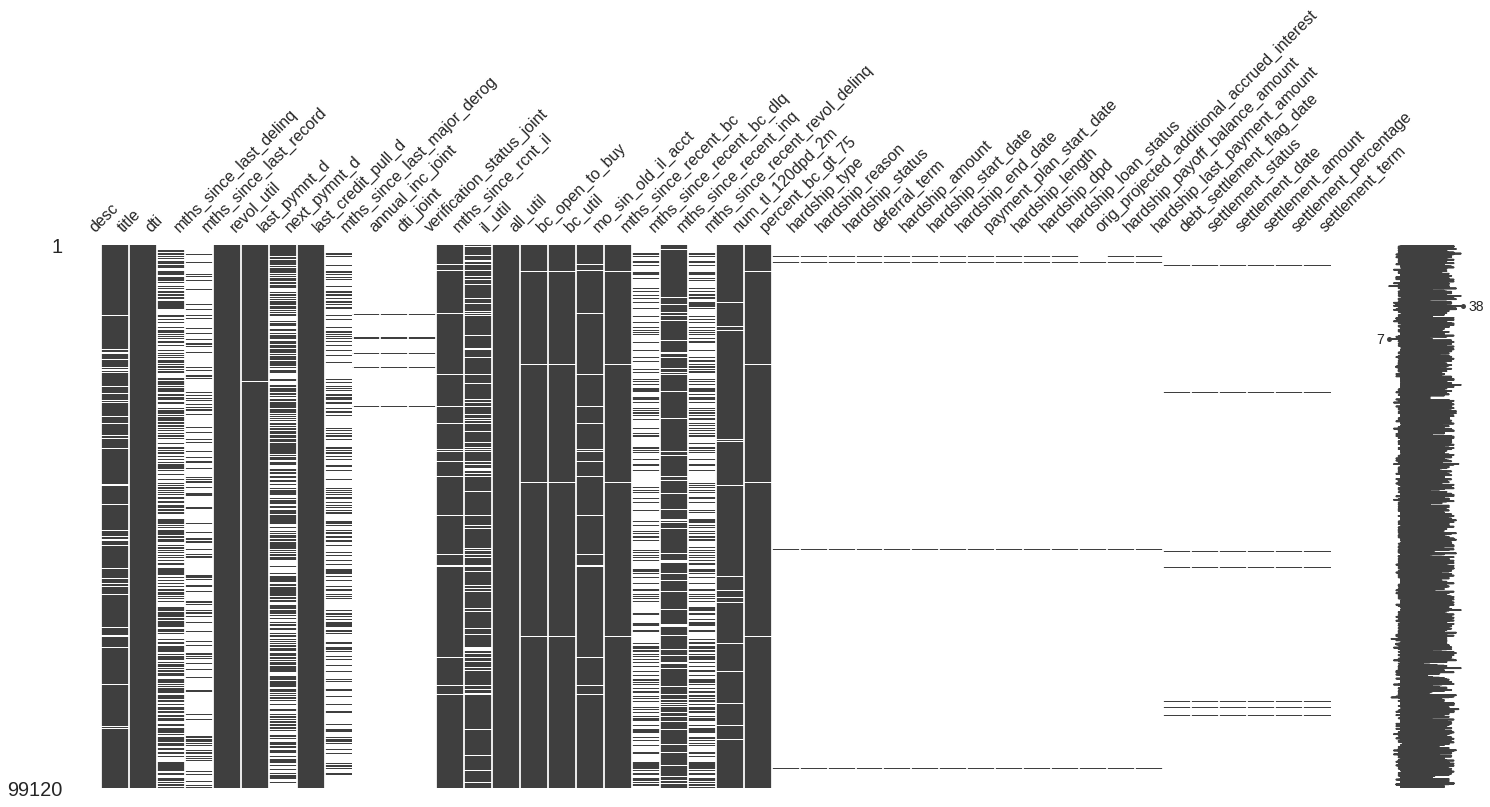

In [51]:
plt.figure(figsize = (64, 32))
missing_col = []
missing_col_nums = []
for col in df_clean.columns:
    missing_nums = len(df_clean[df_clean[col].isnull()].index)
    if missing_nums:
        missing_col_nums.append((col, round(missing_nums/len(df_clean), 5)))
        missing_col.append(col)
msno.matrix(df_clean[missing_col])

In [52]:
for i in sorted(missing_col_nums, key = lambda x: x[1], reverse = True):
    print(i)
    if i[1] > 0.7:
        missing_col.remove(i[0])
        missing_col_nums.remove(i)
        df_clean.drop(i[0], axis = 1, inplace = True)

('desc', 0.99994)
('annual_inc_joint', 0.99478)
('dti_joint', 0.99478)
('verification_status_joint', 0.99478)
('orig_projected_additional_accrued_interest', 0.99307)
('hardship_type', 0.99088)
('hardship_reason', 0.99088)
('hardship_status', 0.99088)
('deferral_term', 0.99088)
('hardship_amount', 0.99088)
('hardship_start_date', 0.99088)
('hardship_end_date', 0.99088)
('payment_plan_start_date', 0.99088)
('hardship_length', 0.99088)
('hardship_dpd', 0.99088)
('hardship_loan_status', 0.99088)
('hardship_payoff_balance_amount', 0.99088)
('hardship_last_payment_amount', 0.99088)
('debt_settlement_flag_date', 0.98746)
('settlement_status', 0.98746)
('settlement_date', 0.98746)
('settlement_amount', 0.98746)
('settlement_percentage', 0.98746)
('settlement_term', 0.98746)
('mths_since_last_record', 0.80032)
('mths_since_recent_bc_dlq', 0.73751)
('mths_since_last_major_derog', 0.70367)
('mths_since_recent_revol_delinq', 0.63069)
('mths_since_last_delinq', 0.4616)
('next_pymnt_d', 0.4414)
('il

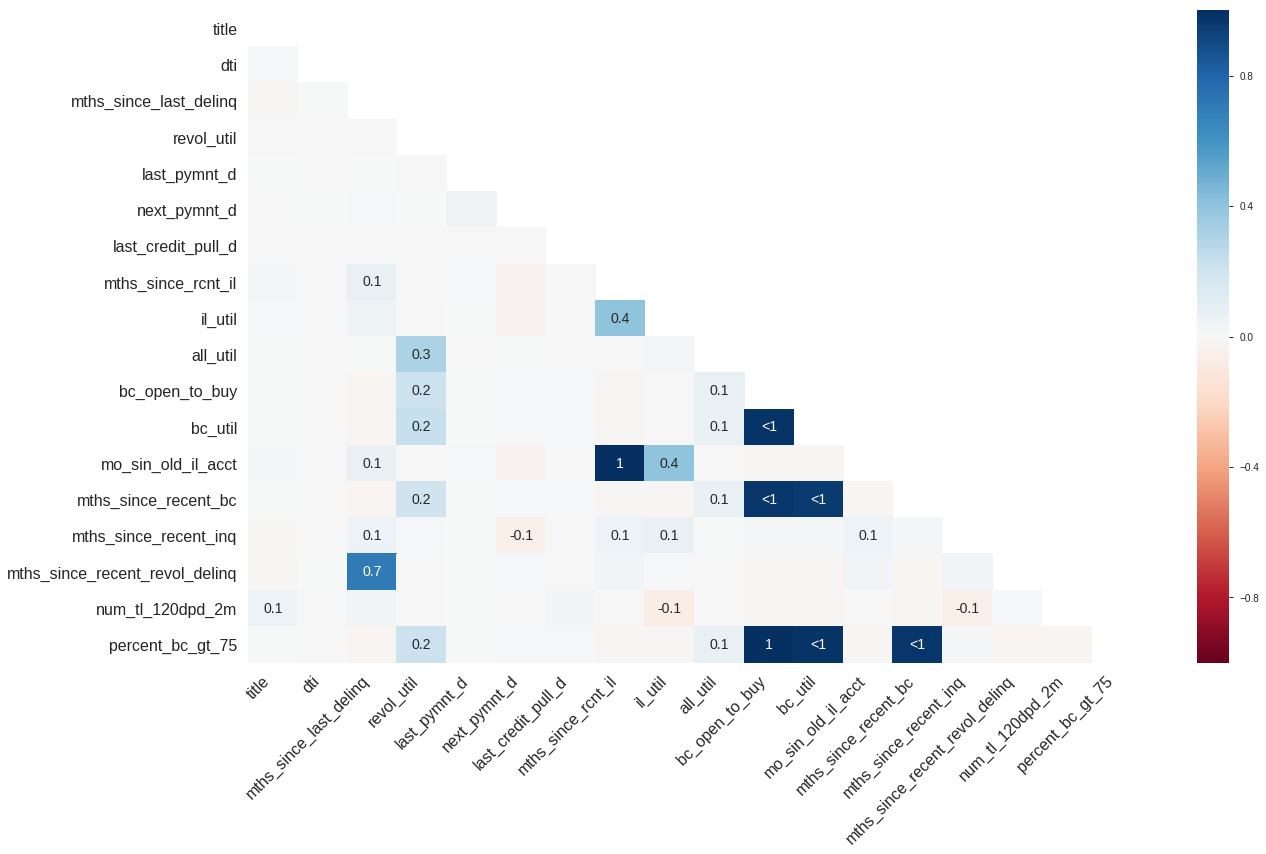

In [53]:
msno.heatmap(df_clean[missing_col])